In [2]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# <span style="color:blue">Homework 6: Support Vector Machines
## <span style="color:blue">Conceptual exercises

<span style="color:blue">Non-linear separation

<span style="color:blue">1. (15 points) Generate a simulated two-class data set with 100 observations and two features in which there is a visible (clear) but still non-linear separation between the two classes. Show that in this setting, a support vector machine with a radial kernel will outperform a support vector classifier (a linear kernel) on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to support your conclusions.

In [532]:
from sklearn.datasets import make_blobs

def multiBlobs(noise = 0, numPerCategory = 100, centers = 2):
    if isinstance(centers, int):
        n_samples = numPerCategory * centers
    else:
        n_samples = numPerCategory * len(centers)
    X, y = sklearn.datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std = (.6 * (noise * 6)))
    datDict = {
        'vect' : list(X),
        'category' : y,
    }
    return pd.DataFrame(datDict)

In [624]:
from sklearn.model_selection import train_test_split

noise = 0.8
data = multiBlobs(noise)
dfTrain, dfTest = train_test_split(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


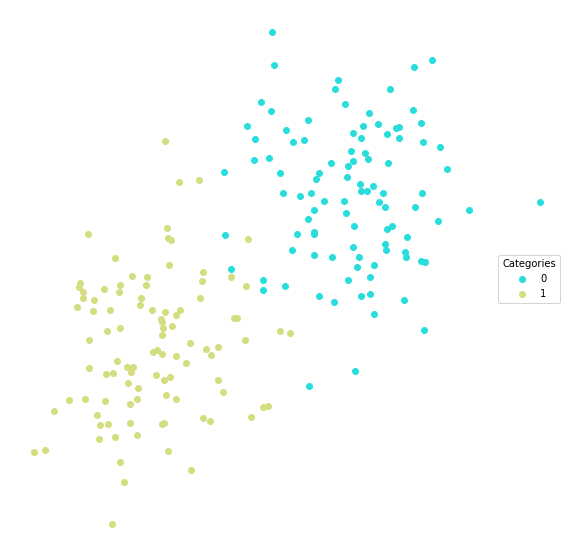

In [625]:
def plotter(df):
    fig, ax = plt.subplots(figsize = (10,10))
    pallet = seaborn.color_palette(palette='rainbow', n_colors= len(set(df['category'])))
    for i, cat in enumerate(set(df['category'])):
        a = np.stack(df[df['category'] == cat]['vect'])
        ax.scatter(a[:,0], a[:, 1], c = pallet[i], label = cat)
    ax.legend(loc = 'center right', title = 'Categories')
    ax.axis('off')
    plt.show()
    plt.close()
    
plotter(data)

In [555]:
from sklearn.svm import SVC, LinearSVC

In [626]:
svc = SVC(kernel = 'linear')

In [627]:
X_train = np.stack(dfTrain['vect'], axis=0)
svc.fit(X_train, dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [628]:
from sklearn.metrics import accuracy_score
accuracy_score(svc.predict(X_train), dfTrain['category'])

0.9733333333333334

In [629]:
svm = SVC(kernel = 'rbf', gamma='scale')
svm.fit(X_train, dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [630]:
accuracy_score(svm.predict(X_train), dfTrain['category'])

0.9866666666666667

In [632]:
def plotregions(clf, df, h = .01):

    transformedDF = df
    catsMap = {c : i for i, c in enumerate(np.unique(df['category']))}

    fig, ax = plt.subplots(figsize = (6,6))
    ax.axis('off')
    pallet = seaborn.color_palette(palette='rainbow', n_colors = len(set(transformedDF['category'])))

    if np.random.choice(df['vect']).shape[0] > 2:
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))
        Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        reduced_data = np.stack(df['vect'], axis=0)
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.vectorize(lambda x: catsMap[x])(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    for i, cat in enumerate(set(df['category'])):
        a = np.stack(transformedDF[transformedDF['category'] == cat]['vect'])
        ax.scatter(a[:,0], a[:, 1], c = pallet[catsMap[cat]], label = cat)
    ax.legend(loc = 'center right', title = 'Categories')
    plt.show()
    plt.close()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


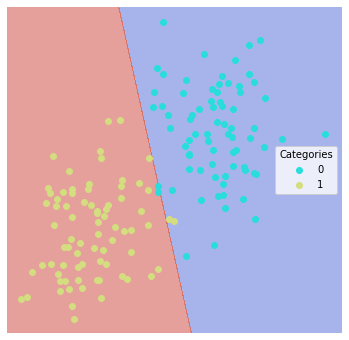

In [633]:
plotregions(svc, dfTrain)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


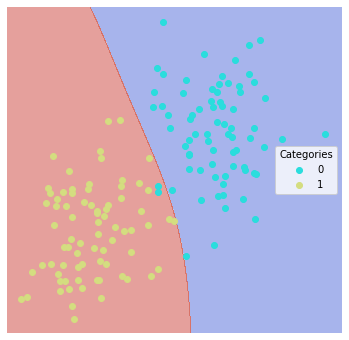

In [634]:
plotregions(svm, dfTrain)

In [635]:
X_test = np.stack(dfTest['vect'], axis=0)
print('svm', accuracy_score(svm.predict(X_test), dfTest['category']))
print('svc', accuracy_score(svc.predict(X_test), dfTest['category']))

svm 0.94
svc 0.94


Because of the non-linear separation between the two classes, the linear SVC did not performa as well as the the radial kernel SVM on the training. Both models, however, did equally well on the testing dataset. 

## <span style="color:blue">SVM vs. logistic regression
<span style="color:blue">We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. Your goal here is to compare different approaches to estimating non-linear decision boundaries, and thus assess the benefits and drawbacks of each.

2. <span style="color:blue">(5 points) Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with some overlapping, non-linear boundary between them.

In [774]:
#set X1 and X2

x1 = np.random.uniform(-1,1, 500)
x2 = np.random.uniform(-1,1, 500)


In [775]:
# generate data
epsilon = np.random.uniform(0,0.5, 500)
y = x1 + x2 + x2**2 + epsilon

3. <span style="color:blue">(5 points) Plot the observations with colors according to their class labels ($y$). Your plot should display $X_1$ on the $x$-axis and $X_2$ on the $y$-axis.

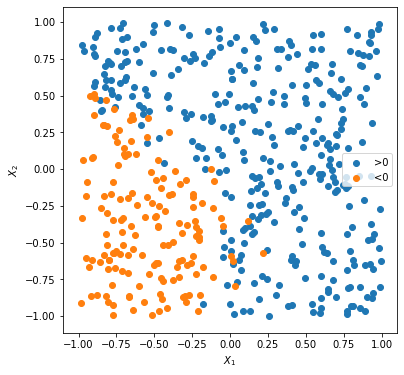

In [776]:
fig, ax = plt.subplots(figsize = (6,6))
pallet = seaborn.color_palette(palette='rainbow', n_colors= 2)
ax.scatter(x1[y >= 0],x2[y >= 0])
ax.scatter(x1[y <= 0],x2[y <= 0])
ax.legend(['>0','<0'], loc = 'center right')
ax.axis('on')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
plt.close()

4. <span style="color:blue">(5 points) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

In [777]:
# have to stack x1 and x2 for log reg
linear_prep = np.stack((x1, x2), axis=1)

In [778]:
from sklearn.linear_model import LogisticRegression
log_reg = (sklearn.linear_model.LogisticRegression())

log_reg.fit(linear_prep, y >= 0)



/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

5. <span style="color:blue">(5 points) Obtain a predicted class label for each observation based on the logistic model previously fit. Plot the observations, colored according to the predicted class labels (the predicted decision boundary should look linear).

In [779]:
#predict classes
pred_log = log_reg.predict(linear_prep)

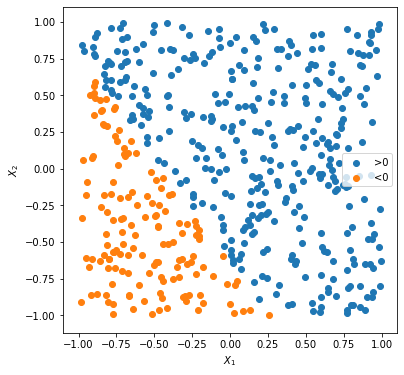

In [780]:
#plot classes
fig, ax = plt.subplots(figsize = (6,6))
pallet = seaborn.color_palette(palette='rainbow', n_colors= 2)
plt.scatter(x1[pred_log],x2[pred_log]) 
plt.scatter(x1[~pred_log],x2[~pred_log]) 
ax.legend(['>0','<0'], loc = 'center right')
ax.axis('on')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
plt.close()

<span style="color:blue">6. <span style="color:blue">(5 points) Now fit a logistic regression model to the data, but this time using some non-linear function of both $X_1$ and $X_2$ as predictors (e.g. $X_1^2, X_1 \times X_2, \log(X_2)$, and so on).

In [781]:
import math
# variable x1 times x2

nonlinear_func = np.stack((x1, x2,(x1**2),(x2**2)), axis=1)
output = y >=0
#logistic regression
non_lr = LogisticRegression().fit(nonlinear_func, output ) 

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<span style="color:blue">7. (5 points) Now, obtain a predicted class label for each observation based on the fitted model with non-linear transformations of the $X$ features in the previous question. Plot the observations, colored according to the new predicted class labels from the non-linear model (the decision boundary should now be obviously non-linear). If it is not, then repeat earlier steps until you come up with an example in which the predicted class labels and the resultant decision boundary are clearly non-linear.

In [782]:
pred_non_lr = non_lr.predict(nonlinear_func)

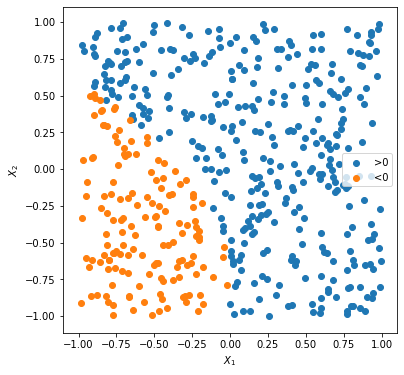

In [783]:

# predictions with nonlinear
fig, ax = plt.subplots(figsize = (6,6))
pallet = seaborn.color_palette(palette='rainbow', n_colors= 2)
plt.scatter(x1[pred_non_lr],x2[pred_non_lr]) 
plt.scatter(x1[~pred_non_lr],x2[~pred_non_lr]) 
ax.legend(['>0','<0'], loc = 'center right')
ax.axis('on')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
plt.close()

<span style="color:blue">8. (5 points) Now, fit a support vector classifier (linear kernel) to the data with original $X_1$ and $X_2$ as predictors. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.

In [784]:
svc = SVC(kernel='linear').fit(linear_prep, output)
svc_pred = svc.predict(linear_prep)


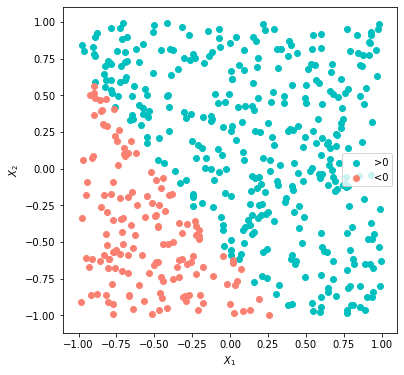

In [785]:
# predictions with svc
fig, ax = plt.subplots(figsize = (6,6))
#pallet = seaborn.color_palette(palette='rainbow', n_colors= 3)
plt.scatter(x1[svc_pred],x2[svc_pred], color = 'c') 
plt.scatter(x1[~svc_pred],x2[~svc_pred], color = 'salmon') 
ax.legend(['>0','<0'], loc = 'center right')
ax.axis('on')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
plt.close()

<span style="color:blue">9. (5 points) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.

In [786]:
#svm classifier
svm.fit(linear_prep, output)
svm_pred = svm.predict(linear_prep)

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


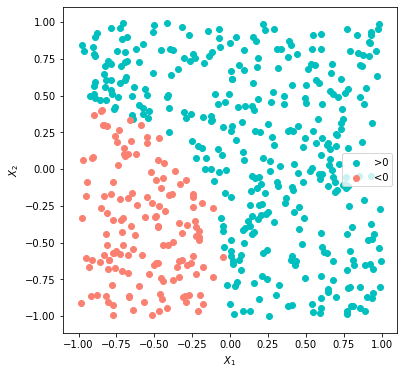

In [788]:
#plot svm
fig, ax = plt.subplots(figsize = (6,6))
#pallet = seaborn.color_palette(palette='rainbow', n_colors= 3)
plt.scatter(x1[svm_pred],x2[svm_pred], color = 'c') 
plt.scatter(x1[~svm_pred],x2[~svm_pred], color = 'salmon') 
ax.legend(['>0','<0'], loc = 'center right')
ax.axis('on')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
plt.close()

<span style="color:blue">10. (5 points) Discuss your results and specifically the tradeoffs between estimating non-linear decision boundaries using these two different approaches.

In [790]:
print(accuracy_score(pred_log, output))
print(accuracy_score(pred_non_lr, output))
print(accuracy_score(svc_pred, output))
print(accuracy_score(svm_pred, output))

0.924
0.95
0.924
0.948


Between the different boundary types, we see that the prediction accuracy from the logistic regression using a non-inear function actually performs the best out all the models. This is probably due to the fact that the non-linear function was similar to the base data generation function. However, using SVM was a close second in accuracy and did quite well in estimating the non-linear decision boundary.

## <span style="color:blue">Tuning cost
<span style="color:blue">In class we learned that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate that claim.

<span style="color:blue">11. (5 points) Generate two-class data with $p=2$ in such a way that the classes are just barely linearly separable.

In [305]:
def multiBlobs(noise = 0, numPerCategory = 100, centers = 2):
    if isinstance(centers, int):
        n_samples = numPerCategory * centers
    else:
        n_samples = numPerCategory * len(centers)
    X, y = sklearn.datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std = (.6 * (noise * 6)))
    datDict = {
        'vect' : list(X),
        'category' : y,
    }
    return pd.DataFrame(datDict)

In [314]:
noise = 0.6
data_2 = multiBlobs(noise)
dfTrain, dfTest = train_test_split(data_2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


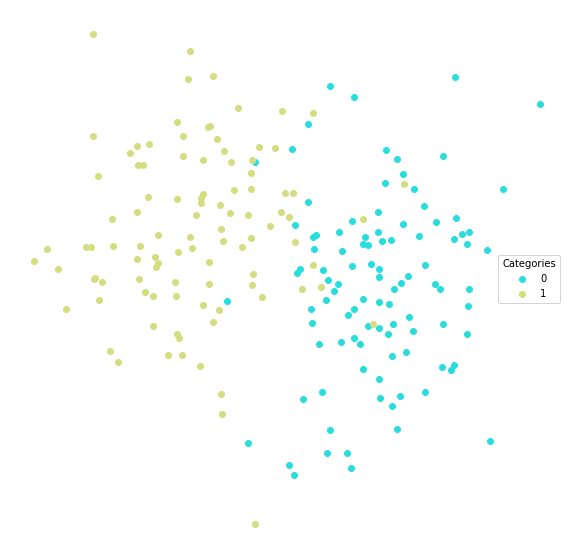

In [315]:
plotter(data_2)

<span style="color:blue">12. (5 points) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are made for each value of cost considered, and how does this relate to the cross-validation errors obtained?



In [792]:
costs = np.arange(0.5, 3, 0.5)

X_train = np.stack(dfTrain['vect'], axis =0)
y_train = dfTrain['category']

for cost in costs:
    svc_linear = SVC(C=cost, kernel = 'linear')
    print('cv error for C = {}'.format(cost))
    accu = cross_val_score(svc_linear, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
    
    print(1-np.mean(accu))
    

cv error for C = 0.5
0.045952380952380856
cv error for C = 1.0
0.03928571428571426
cv error for C = 1.5
0.03928571428571426
cv error for C = 2.0
0.045952380952380856
cv error for C = 2.5
0.045952380952380856


<span style="color:blue">13. (5 points) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?


In [283]:
dfTest.head()

,vect,category
170,"[-4.57510217154708, 2.97463383847121]",0
119,"[0.03143049528769626, 7.765868041615752]",1
52,"[7.128040936041439, 10.61613400100343]",1
93,"[-1.3634811022291884, 5.048278794338122]",1
68,"[-9.481173211727787, 8.50171624636198]",0


In [791]:
X_test = np.stack(dfTrain['vect'], axis =0)
y_test = dfTrain['category']

for cost in costs:
    svc_linear = SVC(C=cost, kernel = 'linear')
    svc_linear.fit(X_train, y_train)
    preds = svc_linear.predict(X_test)
    print('cv error for C = {}'.format(cost))
    accu = cross_val_score(svc_linear, X_test, y_test)
    print(1 - np.mean(accu))
    

cv error for C = 0.5
0.039879951980792305
cv error for C = 1.0
0.039879951980792305
cv error for C = 1.5
0.039879951980792305
cv error for C = 2.0
0.039879951980792305
cv error for C = 2.5
0.039879951980792305


/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it exp

<span style="color:blue">14. (5 points) Discuss your results.

Cross validation error remained in training was lowest with a cost value of 1 and 1.5. For the test error, we saw no change with the different values of cost.

## <span style="color:blue">Application: Predicting attitudes towards racist college professors
<span style="color:blue">In this problem set, you are going to return to the GSS question from last week and predict attitudes towards racist college professors. Recall, each respondent was asked "Should a person who believes that Blacks are genetically inferior be allowed to teach in a college or university?" Given the kerfuffle over Richard J. Herrnstein and Charles Murray's The Bell Curve and the ostracization of Nobel laureate James Watson over his controversial views on race and intelligence, this analysis will provide further insight into the public debate over this issue.

<span style="color:blue">gss_*.csv contain a selection of features from the 2012 GSS. The outcome of interest colrac is a binary variable coded as either ALLOWED or NOT ALLOWED, where 1 = the racist professor should be allowed to teach, and 0 = the racist professor should not be allowed to teach. Documentation for the other predictors (if the variable is not clearly coded) can be viewed here. Some data pre-processing has been done in advance for you to ease your model fitting: (1) Missing values have been imputed; (2) Categorical variables with low-frequency classes had those classes collapsed into an "other" category; (3) Nominal variables with more than two classes have been converted to dummy variables; and (4) Remaining categorical variables have been converted to integer values, stripping their original labels.

<span style="color:blue">This week, building on last week's problem set, you will approach this classification problem from an SVM-based framework.

<span style="color:blue">15. (5 points) Fit a support vector classifier to predict colrac as a function of all available predictors, using 10-fold cross-validation to find an optimal value for cost. Report the CV errors associated with different values of cost, and discuss your results.

<span style="color:blue">16. (15 points) Repeat the previous question, but this time using SVMs with radial and polynomial basis kernels, with different values for gamma and degree and cost. Present and discuss your results (e.g., fit, compare kernels, cost, substantive conclusions across fits, etc.).

In [195]:
gss_train = pd.read_csv('./data/gss_train.csv')

In [197]:
gss_train.head()

,age,attend,authoritarianism,black,born,childs,colath,colrac,colcom,colmil,...,partyid_3_Ind,partyid_3_Rep,relig_CATHOLIC,relig_NONE,relig_other,social_cons3_Mod,social_cons3_Conserv,spend3_Mod,spend3_Liberal,zodiac_other
0,21,0,4,0,0,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
1,42,0,4,0,0,2,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
2,70,1,1,1,0,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35,3,2,0,0,2,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
4,24,3,6,0,1,3,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [198]:
X_train = gss_train.drop(['colrac'], axis=1) 
y_train = gss_train['colrac']

In [239]:
# set costs
import numpy as np
costs = np.arange(0.5, 3, 0.5)


In [240]:
from sklearn.model_selection import cross_val_score
for cost in costs:
    svc_linear = SVC(C=cost, kernel = 'linear')
    #svc_linear.fit(X_train, y_train)
    print('cv error for C = {}'.format(cost))
    accu = cross_val_score(svc_linear, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
    
    print(np.mean(accu))
    

cv error for C = 0.5
0.7967491186570764
cv error for C = 1.0
0.7940418195212058
cv error for C = 1.5
0.7933615474123623
cv error for C = 2.0
0.7933615474123623
cv error for C = 2.5
0.794037223088038


The cross validation error is lowest when the cost is 0.5.

In [793]:
gammas = ['auto', 'scale']

for cost in costs:
    for gamma in gammas:
        svm = SVC(C=cost, kernel = 'rbf', gamma=gamma)
        svm_score = cross_val_score(svm, X_train, 
                               y_train, scoring = 'accuracy', cv = 10)
        print('cv error for C = {}'.format(cost))
        print('and gamma = {}'.format(gamma))
        print(np.mean(svm_score))


cv error for C = 0.5
and gamma = auto
0.9875
cv error for C = 0.5
and gamma = scale
0.9674404761904762
cv error for C = 1.0
and gamma = auto
0.9870833333333333
cv error for C = 1.0
and gamma = scale
0.9741071428571428
cv error for C = 1.5
and gamma = auto
0.9870833333333333
cv error for C = 1.5
and gamma = scale
0.9741071428571428
cv error for C = 2.0
and gamma = auto
0.99375
cv error for C = 2.0
and gamma = scale
0.9741071428571428
cv error for C = 2.5
and gamma = auto
0.99375
cv error for C = 2.5
and gamma = scale
0.9678571428571429


From a cost of 2.0 to 2.5 and with an auto gamma, the radial kernel performed the best.According to the sklearn documentation, the gamma parameter defines how close or far a sample's radius will be as a support vector. 

In [245]:
degrees = range(0,5)

for cost in costs:
    for degree in degrees:
        for gamma in gammas:
            svc_poly = SVC(C = cost, kernel = 'poly', degree=degree, gamma = gamma)
            svc_poly_score = cross_val_score(svc_poly, X_train, 
                                       y_train, scoring = 'accuracy', cv = 10)
            print('cv error for C = {}'.format(cost), 'and degree = {}'.format(degree))
            print(np.mean(svc_poly_score))
        

cv error for C = 0.5 and degree = 0
0.5253223981411901
cv error for C = 0.5 and degree = 0
0.5253223981411901
cv error for C = 0.5 and degree = 1
0.7940554854265305
cv error for C = 0.5 and degree = 1
0.70500570081107
cv error for C = 0.5 and degree = 2
0.7744192761450671
cv error for C = 0.5 and degree = 2
0.7366674132014497
cv error for C = 0.5 and degree = 3
0.7379461470784577
cv error for C = 0.5 and degree = 3
0.7365988985835583
cv error for C = 0.5 and degree = 4
0.7372794791778492
cv error for C = 0.5 and degree = 4
0.7237650402079931
cv error for C = 1.0 and degree = 0
0.5253223981411901
cv error for C = 1.0 and degree = 0
0.5253223981411901
cv error for C = 1.0 and degree = 1
0.7981096628747635
cv error for C = 1.0 and degree = 1
0.732631498091709
cv error for C = 1.0 and degree = 2
0.7744011988978432
cv error for C = 1.0 and degree = 2
0.7548563630059315
cv error for C = 1.0 and degree = 3
0.7379461470784577
cv error for C = 1.0 and degree = 3
0.745382805761521
cv error for C

It's difficult to extract strong meaning from the attitudes towards racist college professors in th dataset from this exercise alone. It would seem that the best performing parameters of the polynomial kernel was when the degree was 1 and the cost was 1.5 suggesting that the poly was not the best fit for the data but rather a linear kernel would be  a better match.